In [1]:
# imports
import chess.pgn
import chess
import io
import json
import pandas as pd
import matplotlib.pyplot as plt
from itertools import dropwhile
from collections import Counter
from datetime import datetime
import calplot

In [9]:
with open("eco.json", 'r') as f:
        OPENINGS = json.load(f)
        
def cleanup(dictionary,occurence_count: int):
    """Remove the all the keys which have count less than the given occurence count"""
    for key, count in dropwhile(lambda k: k[1] >= occurence_count, dictionary.most_common()):
        del dictionary[key]

    return dictionary

def findOpening(eco):
    for opening in OPENINGS:
        if eco == opening['eco']:
            return opening['name']

In [19]:
all_games = []
all_moves = {}
ECO = []

for file_name in ['2021/chess.com.pgn']:    
    with open(file_name, 'r') as f:
        while True:
            game = chess.pgn.read_game(f)
            if game is None:
                break

            headers = dict(game.headers)
            headers["moves"] = game.board().variation_san(game.mainline_moves())
            ECO.append(headers['ECO'])
            
            all_games.append(headers)

            for move in game.mainline_moves():
                if str(move) not in all_moves:
                    all_moves[str(move)] = 1
                else:
                    all_moves[str(move)] += 1

                break

<AxesSubplot:title={'center':'Most common first move: 2021'}, xlabel='First move'>

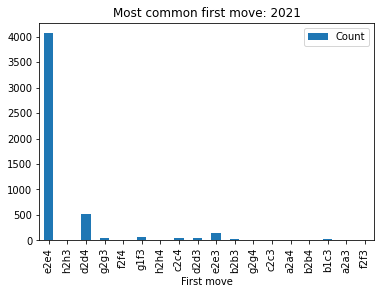

In [20]:
# The most common first move played
moves_df = pd.DataFrame(all_moves.items(), columns=["First move", "Count"])
moves_df.plot(kind="bar", x=0,y=1, title="Most common first move: 2021")

Text(1.05, 1.0, "B01 - Scandinavian Defense\nC47 - Four Knights Game: Italian Variation, Noa Gambit\nA06 - Nimzo-Larsen Attack: Classical Variation, 2. b3\nC40 - Elephant Gambit\nC41 - Philidor Defense\nD00 - Amazon Attack\nA00 - Amar Gambit\nB23 - Sicilian Defense: Closed\nC42 - Petrov's Defense\nB07 - Czech Defense\nC00 - French Defense\nB00 - Barnes Defense\nC46 - Four Knights Game\nD20 - Queen's Gambit Accepted\nC25 - Vienna Game: Anderssen Defense")

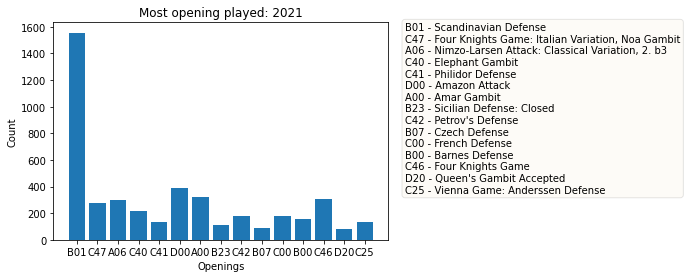

In [21]:
# Most Opening played
# We only show openings played is more than 50 games.
# If you want to change that then edit the value in cleanup() function

eco_count = cleanup(Counter(ECO), 80)
eco_df = pd.DataFrame(eco_count.items(), columns=["Opening", "Count"])

fig = plt.figure()
ax = fig.add_subplot(111)
textstr = []

for k,_ in eco_count.items():
    opening_name = findOpening(k)
    textstr.append('{} - {}'.format(k, opening_name))
    
ax.set_title("Most opening played: 2021")
plt.xlabel("Openings")
plt.ylabel("Count")
plt.bar(eco_df['Opening'], eco_df['Count'])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.1)
ax.text(1.05, 1.0, "\n".join(textstr), transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

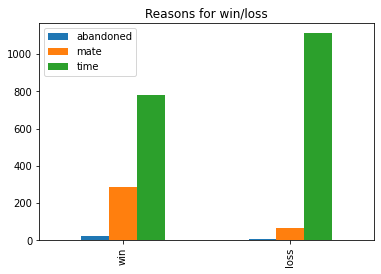

In [11]:
# Replace these with your lichess and chess.com usernames

USERNAMES = ["cmrade", "falc0nfeast"] 
reasons = {"abandoned": {"win": 0, "loss": 0}, "mate": {"win": 0, "loss": 0}, "time": {"win": 0, "loss": 0}}

for games in all_games: 
    white = games["White"]
    black = games["Black"]
    result = games["Result"].split("-")
    termination = games["Termination"]

    for k,v in reasons.items():
        if k.lower() in termination.lower():
            if result[0] == '1':
                if white in USERNAMES:
                    v["win"] += 1
                else:
                    v["loss"] += 1

result_df = pd.DataFrame(reasons)
result_df.plot(kind="bar", title="Reasons for win/loss")
plt.show()

Total games played in 2020:  3280


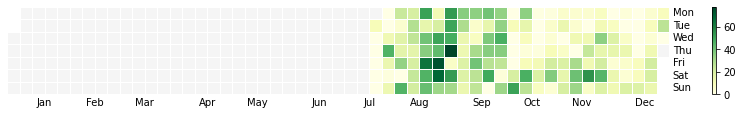

In [23]:
# calendar Heatmap

dayCount = {}
total = 0
for game in all_games:
    day = datetime.strptime(game["UTCDate"], "%Y.%m.%d")
    if day.year == 2020:
        total += 1
        if day in dayCount:
            dayCount[day] += 1
        else:
            dayCount[day] = 0

series = pd.Series(dayCount)
calplot.calplot(series, cmap='YlGn', edgecolor=None, yearlabels=False)

print("Total games played in 2020: ", total)
